In [ ]:
from pathlib import Path
import mgmGrowth.utils.flair2nrrd as flair2nrrd

root   = Path("/home/mariopasc/Python/Datasets/Meningiomas/men")
outdir = Path("/home/mariopasc/Python/Datasets/Meningiomas/Meningioma_Adquisition/RM")

df = flair2nrrd.batch_convert_flair(root, outdir)
df.head()


--- Statistics for T1 (P1) ---
File Path: /home/mariopasc/Python/Datasets/Meningiomas/raw/Meningioma_Adquisition/RM/T1/P1/T1_P1.nrrd
Shape: (416, 512, 192)
Voxel Spacing: N/A
Data Type: uint16
Intensity Min: 0
Intensity Max: 1766
Intensity Mean: 132.33
Intensity Std Dev: 192.21
------------------------------
--- Statistics for SUSC (P1) ---
File Path: /home/mariopasc/Python/Datasets/Meningiomas/raw/Meningioma_Adquisition/RM/SUSC/P1/SUSC_P1.nrrd
Shape: (264, 384, 21)
Voxel Spacing: N/A
Data Type: uint16
Intensity Min: 0
Intensity Max: 732
Intensity Mean: 113.70
Intensity Std Dev: 154.16
------------------------------
--- Statistics for T2 (P1) ---
File Path: /home/mariopasc/Python/Datasets/Meningiomas/raw/Meningioma_Adquisition/RM/T2/P1/T2_P1.nrrd
Shape: (320, 320, 21)
Voxel Spacing: N/A
Data Type: uint16
Intensity Min: 0
Intensity Max: 1530
Intensity Mean: 187.87
Intensity Std Dev: 257.58
------------------------------
--- Statistics for FLAIR (P1) ---
File Path: /home/mariopasc/Python

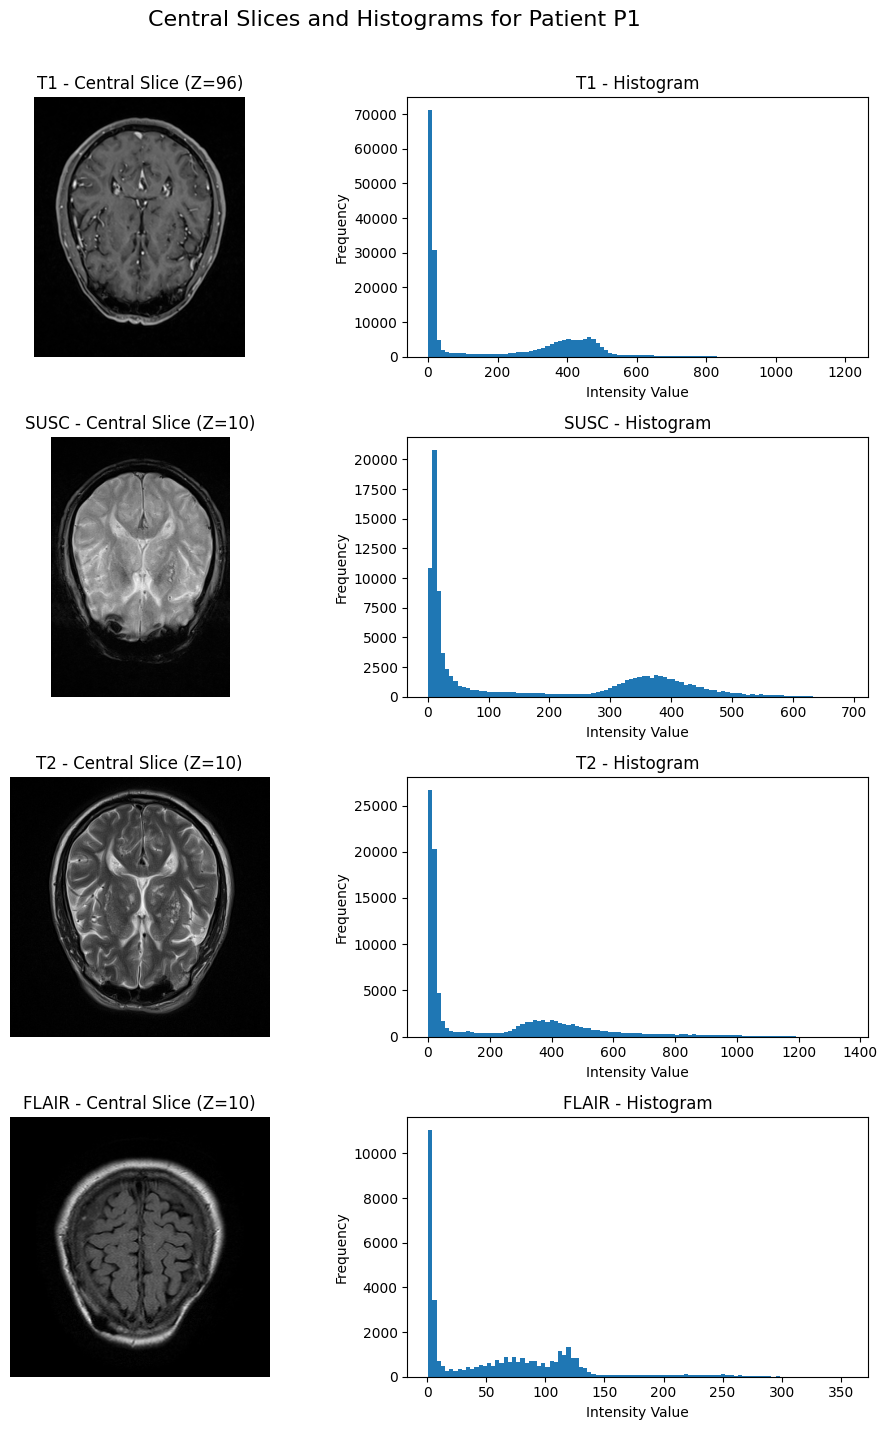

In [ ]:
import os
import nrrd
import numpy as np
import matplotlib.pyplot as plt

# Define the base path and pulse sequences
base_path = "/home/mariopasc/Python/Datasets/Meningiomas/raw/Meningioma_Adquisition/RM"
pulses = ["T1", "SUSC", "T2", "FLAIR"]
patient_id = "P1"

# Create a figure with subplots (4 rows, 2 columns)
fig, axes = plt.subplots(len(pulses), 2, figsize=(10, 15))
fig.suptitle(f'Central Slices and Histograms for Patient {patient_id}', fontsize=16)

for i, pulse in enumerate(pulses):
    # Construct the file path
    file_path = os.path.join(base_path, pulse, patient_id, f"{pulse}_{patient_id}.nrrd")

    try:
        # Load the NRRD image
        data, header = nrrd.read(file_path)

        # --- Print Statistics ---
        print(f"--- Statistics for {pulse} ({patient_id}) ---")
        print(f"File Path: {file_path}")
        print(f"Shape: {data.shape}")
        # Extract spacing - check header structure as it might vary
        spacing = header.get('space_directions', 'N/A')
        if isinstance(spacing, np.ndarray):
            spacing = tuple(spacing)
        print(f"Voxel Spacing: {spacing}")
        print(f"Data Type: {data.dtype}")
        print(f"Intensity Min: {np.min(data)}")
        print(f"Intensity Max: {np.max(data)}")
        print(f"Intensity Mean: {np.mean(data):.2f}")
        print(f"Intensity Std Dev: {np.std(data):.2f}")
        print("-" * 30)
        # ------------------------

        # Get the central slice index (assuming Z-axis is the last dimension)
        center_slice_idx = data.shape[-1] // 2
        center_slice = data[:, :, center_slice_idx]

        # Plot the central slice
        ax_img = axes[i, 0]
        ax_img.imshow(center_slice.T, cmap='gray', origin='lower')
        ax_img.set_title(f"{pulse} - Central Slice (Z={center_slice_idx})")
        ax_img.axis('off')

        # Plot the histogram of the central slice
        ax_hist = axes[i, 1]
        # Flatten the slice and ignore zero background pixels for a potentially cleaner histogram
        non_zero_pixels = center_slice[center_slice > 0].flatten()
        if non_zero_pixels.size > 0:
             ax_hist.hist(non_zero_pixels, bins=100)
        else:
             ax_hist.hist(center_slice.flatten(), bins=100) # Fallback if all pixels are zero
        ax_hist.set_title(f"{pulse} - Histogram")
        ax_hist.set_xlabel("Intensity Value")
        ax_hist.set_ylabel("Frequency")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        axes[i, 0].set_title(f"{pulse} - File Not Found")
        axes[i, 0].axis('off')
        axes[i, 1].set_title(f"{pulse} - Histogram (N/A)")
        axes[i, 1].axis('off')
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        axes[i, 0].set_title(f"{pulse} - Error Loading")
        axes[i, 0].axis('off')
        axes[i, 1].set_title(f"{pulse} - Histogram (Error)")
        axes[i, 1].axis('off')


# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout to prevent title overlap
plt.show()